In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [117]:
path = 'data\cars_train.csv'
df = pd.read_csv(path)

In [138]:
df

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017,67772,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59008
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017,62979,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33263
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019,44070,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81450
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015,85357,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.35890
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015,71491,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,40985083650499509711752444068313401704,8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMÁTICO,2021,2021,8150,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,403015.28960
29580,164663177589009976281210123914772747797,8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMÁTICO,2020,2020,17987,Automática,4,...,False,NaN,Único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN,88978.08050
29581,170866287186047465472146212778882034162,8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMÁTICO,2019,2019,44742,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218807.64870
29582,208909739337040262669325459666578363437,8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,2021,2022,35376,Automática,4,...,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,68495.99069


In [137]:
n_carros_modelo = df["modelo"].value_counts()
n_carros_modelo

COMPASS         1480
2008            1431
Q3               914
TORO             902
COROLLA          867
                ... 
X-TRAIL            1
QUATTROPORTE       1
ES                 1
S4                 1
SLK 230            1
Name: modelo, Length: 457, dtype: int64

Apenas algumas configurações para melhor visualizar as informações

In [145]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.f' % x)

agrupando os dados por modelo de carro

In [146]:
df_modelos = df.groupby('modelo').mean().sort_values(by=['preco'])
df_modelos

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,elegivel_revisao,veiculo_alienado,preco
modelo,,,,,,,,,,
PASEO,8,1994,2011,182751,2,0,0,0,NaN,18528
SYMBOL,8,2006,2011,89440,4,0,0,0,NaN,18764
ESCORT,8,1993,2011,141375,2,0,0,0,NaN,20162
ES,8,1997,2013,168922,4,0,0,0,NaN,21815
STILO,8,1991,2011,111190,4,0,0,0,NaN,23277
...,...,...,...,...,...,...,...,...,...,...
Q8,8,2020,2020,18286,4,0,0,0,NaN,413597
RS6,8,2017,2017,37308,4,0,0,0,NaN,413860
718,12,2017,2018,20638,3,0,0,0,NaN,434673


Distribuição de preço médio dos modelos (preço médio do modelo x numero de modelos)

Text(0.5, 0, 'Preco médio do modelos')

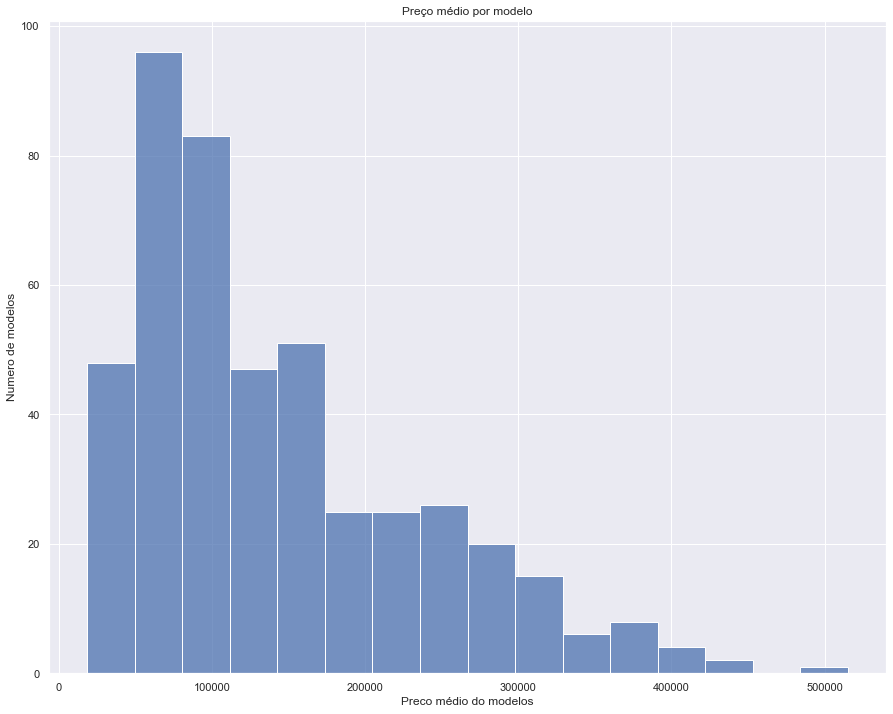

In [135]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_modelos, x = 'preco')
graph.set_title("Preço médio por modelo")
graph.set_ylabel("Numero de modelos")
graph.set_xlabel("Preco médio do modelos")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

In [151]:
n_carros_marca = df["marca"].value_counts()
n_carros_marca

VOLKSWAGEN       4594
CHEVROLET        3020
TOYOTA           2180
HYUNDAI          2043
JEEP             2000
FIAT             1918
BMW              1784
AUDI             1698
PEUGEOT          1675
HONDA            1586
MERCEDES-BENZ    1125
FORD             1060
MITSUBISHI        862
LAND ROVER        760
RENAULT           538
NISSAN            438
KIA               408
PORSCHE           349
VOLVO             287
CITROËN           194
TROLLER           177
RAM               168
CHERY             153
JAGUAR            148
MINI              137
LEXUS              75
SUZUKI             41
SUBARU             41
DODGE              37
CHRYSLER           30
SSANGYONG          14
SMART              12
ALFA ROMEO          9
LIFAN               8
MASERATI            7
JAC                 3
IVECO               2
EFFA                1
FERRARI             1
BRM                 1
Name: marca, dtype: int64

In [148]:
df_marca= df.groupby('marca').mean().sort_values(by=['preco'])
df_marca

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,entrega_delivery,troca,elegivel_revisao,veiculo_alienado,preco
marca,,,,,,,,,,
EFFA,8,2003,2013,187811,2,0,0,0,NaN,40163
BRM,8,1995,2012,59557,4,0,0,0,NaN,47763
CHRYSLER,9,2005,2013,105508,4,0,0,0,NaN,62570
ALFA ROMEO,11,2000,2013,91757,4,0,0,0,NaN,68173
CITROËN,11,2015,2016,80193,4,0,0,0,NaN,73494
DODGE,9,2008,2014,114706,4,0,0,0,NaN,74371
RENAULT,11,2017,2018,63295,4,0,0,0,NaN,82649
LIFAN,9,2017,2017,57131,4,0,0,0,NaN,84162
HYUNDAI,11,2016,2018,61681,4,0,0,0,NaN,84420


Text(0.5, 0, 'Preco médio do marca')

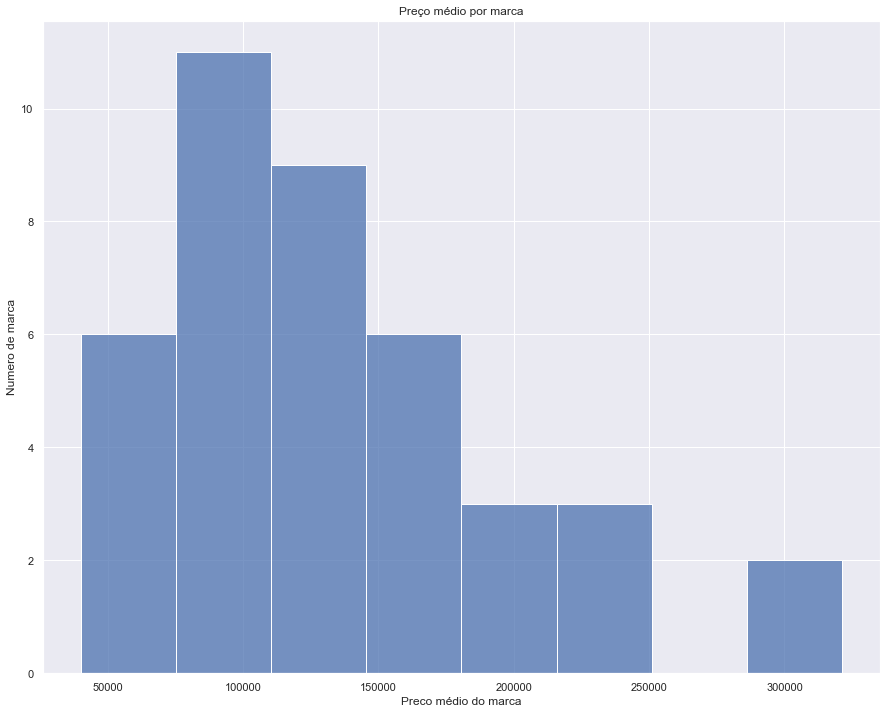

In [149]:
sns.set()
plt.figure(figsize=(15, 12))
graph = sns.histplot(data = df_marca, x = 'preco')
graph.set_title("Preço médio por marca")
graph.set_ylabel("Numero de marca")
graph.set_xlabel("Preco médio do marca")

# formatter1 = EngFormatter(places=0, sep="\N{THIN SPACE}")  # U+2009
# graph.xaxis.set_major_formatter(formatter1)

Segundo a Focus2Move que mantém dados de vendas de carro ao redor do mundo, as 5 marcas mais vendidas em Junho de 2023 foram Fiat, Chevrolet, Wolksvagen, Toyota e Hyunday (https://www.focus2move.com/brazil-vehicles-market/). Portanto para definir qual melhor estado para se vender uma marca popular vamos filtrar os dados por essas 5 marcas.

In [ ]:
top_brands = ['VOLKSWAGEN','CHEVROLET','FIAT','TOYOTA','HYUNDAI']

df_marcas_populares = df.loc[df['marca'].isin(top_brands)]
df_marcas_populares

In [ ]:
por_estado = df_marcas_populares.groupby('estado_vendedor').mean().sort_values(by=['estado_vendedor'])
por_estado

In [ ]:
por_estado = df.groupby('estado_vendedor').mean().sort_values(by=['estado_vendedor'])
por_estado

In [217]:
por_estado_media = df_marcas_populares.groupby('estado_vendedor').mean().sort_values(by=['estado_vendedor'])['preco']
por_estado_min = df_marcas_populares.groupby('estado_vendedor').min().sort_values(by=['estado_vendedor'])['preco']
por_estado_max = df_marcas_populares.groupby('estado_vendedor').max().sort_values(by=['estado_vendedor'])['preco']
por_estado_std = df_marcas_populares.groupby('estado_vendedor').std().sort_values(by=['estado_vendedor'])['preco']

por_estado_std

C:\Users\mptri\AppData\Local\Temp\ipykernel_18932\3175789273.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  por_estado_min = df_marcas_populares.groupby('estado_vendedor').min().sort_values(by=['estado_vendedor'])['preco']
C:\Users\mptri\AppData\Local\Temp\ipykernel_18932\3175789273.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  por_estado_max = df_marcas_populares.groupby('estado_vendedor').max().sort_values(by=['estado_vendedor'])['preco']


estado_vendedor
Acre (AC)                   49848
Alagoas (AL)                65477
Amazonas (AM)               26017
Bahia (BA)                  64203
Ceará (CE)                  50404
Espírito Santo (ES)         36789
Goiás (GO)                  65722
Maranhão (MA)                6700
Mato Grosso (MT)            63789
Mato Grosso do Sul (MS)     45837
Minas Gerais (MG)           67732
Paraná (PR)                 70314
Paraíba (PB)                33995
Pará (PA)                   41586
Pernambuco (PE)             52998
Piauí (PI)                  55961
Rio Grande do Norte (RN)    53425
Rio Grande do Sul (RS)      68423
Rio de Janeiro (RJ)         66121
Rondônia (RO)                2936
Roraima (RR)                 4209
Santa Catarina (SC)         63641
Sergipe (SE)               108336
São Paulo (SP)              62960
Tocantins (TO)              39940
Name: preco, dtype: float64